**Take Home Problems Week-3**

*Rushali Moteria*

1. Filter the data to include only weekdays (Monday to Friday) and
plot a line graph showing the pedestrian counts for each day of the
week.



In [28]:
import pandas as pd

import matplotlib.pyplot as plt

url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df.head()


<ipython-input-28-806526b99837>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


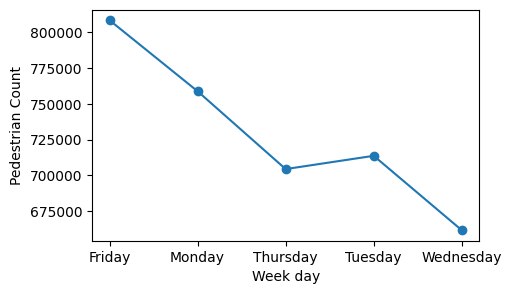

In [29]:
# Read the dataset

df['DayOfWeek'] = df['hour_beginning'].dt.day_name()

filtered_df = df[df['DayOfWeek'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

weekday_counts = filtered_df.groupby('DayOfWeek')['Towards Brooklyn'].sum()

plt.figure(figsize=(5, 3))
plt.plot(weekday_counts.index, weekday_counts.values, marker='o')
plt.xlabel('Week day')
plt.ylabel('Pedestrian Count')
plt.show()





2. Track pedestrian counts on the Brooklyn Bridge for the year 2019
and analyze how different weather conditions influence pedestrian
activity in that year. Sort the pedestrian count data by weather
summary to identify any correlations( with a correlation matrix)
between weather patterns and pedestrian counts for the selected year.

-This question requires you to show the relationship between a
numerical feature(Pedestrians) and a non-numerical feature(Weather
Summary). In such instances we use Encoding. Each weather condition
can be encoded as numbers( 0,1,2..). This technique is called One-hot
encoding.

-Correlation matrices may not always be the most suitable
visualization method for relationships involving categorical
datapoints, nonetheless this was given as a question to help you
understand the concept better.


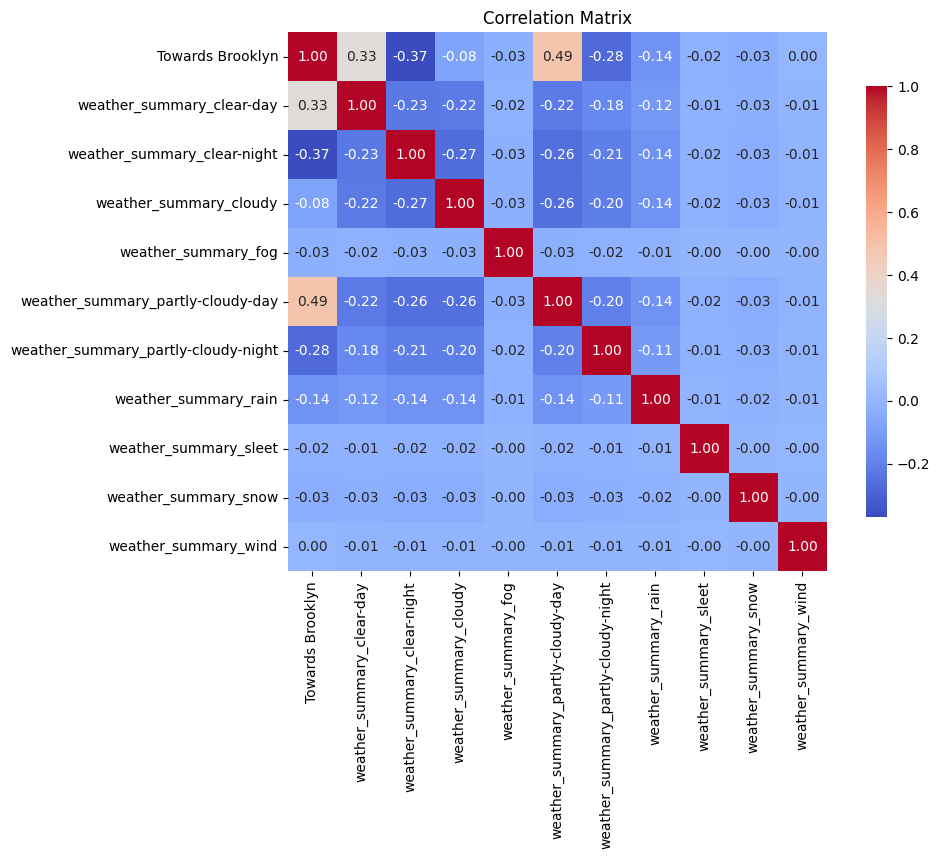

In [31]:
import seaborn as sns

df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

df_filter_year = df[df['hour_beginning'].dt.year == 2019]

weather_dummies = pd.get_dummies(df_filter_year['weather_summary'], prefix='weather_summary')
#print(weather_dummies)

df_new = pd.concat([df_filter_year[['Towards Brooklyn']], weather_dummies], axis=1)

corr_matrix = df_new.corr()

pedestrian_corr= corr_matrix['Towards Brooklyn'].drop('Towards Brooklyn')

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

3. Implement a custom function to categorize time of day into morning,
afternoon, evening, and night, and create a new column in the
DataFrame to store these categories. Use this new column to analyze
pedestrian activity patterns throughout the day.


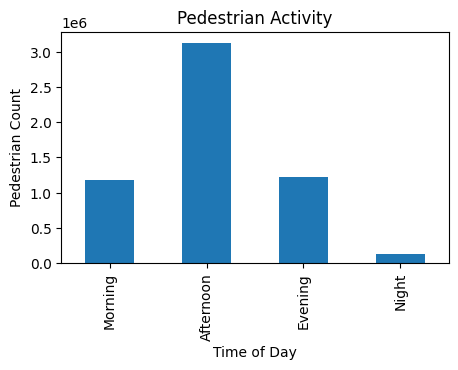

In [36]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])

def time_category(hour):
    if hour.hour >= 5 and hour.hour < 12:
        return 'Morning'
    elif hour.hour >= 12 and hour.hour < 17:
        return 'Afternoon'
    elif hour.hour >= 17 and hour.hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time_of_day'] = df['hour_beginning'].apply(time_category)

time_of_day_counts = df.groupby('Time_of_day')['Towards Brooklyn'].sum().reindex(['Morning', 'Afternoon', 'Evening', 'Night'])

plt.figure(figsize=(5, 3))
time_of_day_counts.plot(kind='bar')
plt.title('Pedestrian Activity')
plt.xlabel('Time of Day')
plt.ylabel('Pedestrian Count')
plt.show()